<a href="https://colab.research.google.com/github/barish-bit/Analyzing_Convection-Soil_Moisture_Regimes_from_Reanalysis_Data/blob/main/Soil_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import netCDF4
import numpy
import xarray

In [ ]:
#ds = xarray.open_mfdataset('/content/adaptor.*.nc',combine = 'nested', concat_dim="time")

In [ ]:
#ds.to_netcdf('soil_combined2020.nc')

In [ ]:
pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.5 MB/s eta 0:00:00


In [ ]:
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
data= Dataset(r"/content/adaptor.mars.internal-1677868014.0026734-15850-7-14818409-eba4-4349-aed9-90357a1a7748.nc")
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-03-03 18:26:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data3/adaptor.mars.internal-1677868014.0026734-15850-7-14818409-eba4-4349-aed9-90357a1a7748.nc /cache/tmp/14818409-eba4-4349-aed9-90357a1a7748-adaptor.mars.internal-1677867989.1203988-15850-10-tmp.grib
    dimensions(sizes): longitude(121), latitude(121), time(365)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 t2m(time, latitude, longitude)
    groups: 


In [ ]:
lons= data.variables["longitude"][:]
print(lons)
lats= data.variables["latitude"][:]
print(lats)
#time=data.variables["time"]
#print(time)
time= data.variables["time"][:]
print(time)
rainfall= data.variables["t2m"][:]
print(rainfall)

[68.   68.25 68.5  68.75 69.   69.25 69.5  69.75 70.   70.25 70.5  70.75
 71.   71.25 71.5  71.75 72.   72.25 72.5  72.75 73.   73.25 73.5  73.75
 74.   74.25 74.5  74.75 75.   75.25 75.5  75.75 76.   76.25 76.5  76.75
 77.   77.25 77.5  77.75 78.   78.25 78.5  78.75 79.   79.25 79.5  79.75
 80.   80.25 80.5  80.75 81.   81.25 81.5  81.75 82.   82.25 82.5  82.75
 83.   83.25 83.5  83.75 84.   84.25 84.5  84.75 85.   85.25 85.5  85.75
 86.   86.25 86.5  86.75 87.   87.25 87.5  87.75 88.   88.25 88.5  88.75
 89.   89.25 89.5  89.75 90.   90.25 90.5  90.75 91.   91.25 91.5  91.75
 92.   92.25 92.5  92.75 93.   93.25 93.5  93.75 94.   94.25 94.5  94.75
 95.   95.25 95.5  95.75 96.   96.25 96.5  96.75 97.   97.25 97.5  97.75
 98.  ]
[38.   37.75 37.5  37.25 37.   36.75 36.5  36.25 36.   35.75 35.5  35.25
 35.   34.75 34.5  34.25 34.   33.75 33.5  33.25 33.   32.75 32.5  32.25
 32.   31.75 31.5  31.25 31.   30.75 30.5  30.25 30.   29.75 29.5  29.25
 29.   28.75 28.5  28.25 28.   27.75 27.5  

In [ ]:
mp=Basemap(projection ="merc",
            llcrnrlat=5, urcrnrlat=39,
            llcrnrlon=60, urcrnrlon=100,
           resolution= "i")

In [ ]:
lon,lat=np.meshgrid(lons,lats)
x,y= mp(lon,lat)
days=np.arange(0,288)
for i in days:
  c_scheme=mp.pcolor(x,y, rainfall[i,:,:],cmap="jet")
  mp.drawcoastlines()
  mp.drawstates()
  cbar= mp.colorbar(c_scheme, location="right", pad="10%")
  day=i+1
  plt.title("t2m"+str(day))
  plt.clim(275,325)
  plt.savefig(str(day)+"jpg9")
  plt.clf()

<Figure size 576x396 with 0 Axes>

In [ ]:
import PIL

In [ ]:
image_frames=[]
days=np.arange(1,288)
for k in days:
  new_frames= PIL.Image.open(r"/content/"+str(k)+"jpg9.png" )
  image_frames.append(new_frames)
image_frames[0].save("temp of_2021.gif", format="GIF",append_images=image_frames[1:],
                     save_all=True, duration=100, loop=0)

In [ ]:
lat_my= 18
lon_my= 73
sq_diff_lat=(lats-lat_my)**2
sq_diff_lon=(lons-lon_my)**2
min_index_lat=sq_diff_lat.argmin()
min_index_lon=sq_diff_lon.argmin()
print(min_index_lat,min_index_lon)



80 20


In [ ]:
import pandas as pd
units=data.variables["time"].units[:]
starting_date="2021-01-01"
ending_date='2021-12-31'
date_range=pd.date_range(start=starting_date,end=ending_date)
#print(units)
#print(starting_date)
#print(ending_date)
#print(date_range)

In [ ]:
date_range=pd.date_range(start=starting_date,end=ending_date)
date_range=pd.date_range(start=starting_date,end=ending_date)
#print(date_range)
df=pd.DataFrame(0,columns=["t2m"], index=date_range)
#print(df)
dt=np.arange(0,data.variables["time"].size)
for time_index in dt:
  df.iloc[time_index]=rainfall[time_index, min_index_lat,min_index_lon]
print(df)
df.to_csv("pune temp data2 2020.csv")

                   t2m
2021-01-01  296.605450
2021-01-02  297.840344
2021-01-03  295.683810
2021-01-04  296.430701
2021-01-05  296.611922
...                ...
2021-12-27  294.160257
2021-12-28  294.556355
2021-12-29  293.557049
2021-12-30  295.006819
2021-12-31  296.391868

[365 rows x 1 columns]


In [ ]:
import xarray as xr
import pandas as pd

df = ["/content/adaptor.mars.internal-1677866407.9675741-28351-11-6a65319d-15a2-4b19-887e-70cfb6edc61e.nc"]

ds = xr.concat([xr.open_dataset(f) for f in df], dim=['TIME'])

data = ds['t2m'].to_dataframe()
data.to_csv("soil data 2020.csv")

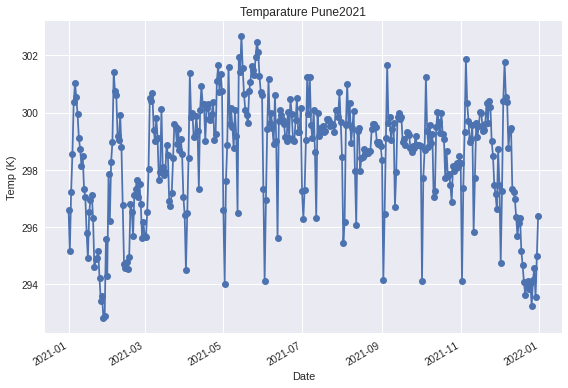

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

data = pd.read_csv('/content/pune temp data2 2020.csv')

data['time'] = pd.to_datetime(data['time'])
data.sort_values('time', inplace=True)

price_date = data['time']
price_close = data['t2m']

plt.plot_date(price_date, price_close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Temparature Pune2021')
plt.xlabel('Date')
plt.ylabel('Temp (K)')

plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
csvfile=open('/content/Five year data of that lon-lat of Pune (1).csv')
csvreader=csv.reader(csvfile)
readdata=next(csvreader)
csvfile.close()

data=df["RAINFALL"].values
#data1=data.reshape()

sp = np.fft.fft(data)
sp_mag=np.abs(sp)/data.size

freq = np.fft.fftfreq(data.shape[-1])

plt.subplot(2,1,1)
plt.plot(data)

plt.subplot(2,1,2)
plt.plot(freq,sp_mag)

plt.show()

In [ ]:
#Extracting one longitude-latitude data from the 5 year data set and plotting them
from netCDF4 import Dataset

import numpy as np
data= Dataset(r"/content/RF25_IMD0p252021.nc")

lons= data.variables["LONGITUDE"][:]

lats= data.variables["LATITUDE"][:]

time=data.variables["TIME"]

time= data.variables["TIME"][:]

lat_my= float(input("Enter the latitude:"))
lon_my= float(input("Enter the longitude:" ))
sq_diff_lat=(lats-lat_my)**2
sq_diff_lon=(lons-lon_my)**2
min_index_lat=sq_diff_lat.argmin()
min_index_lon=sq_diff_lon.argmin()
longi=lons[min_index_lon]
lati=lats[min_index_lat]
print(min_index_lat,min_index_lon)
print(longi,lati)

In [ ]:
import xarray as xr

ds =xr.open_mfdataset(['/content/RF25_IMD0p252017.nc', '/content/RF25_IMD0p252018.nc', '/content/RF25_IMD0p252019.nc','/content/RF25_IMD0p252020.nc','/content/RF25_IMD0p252021.nc'])
ds = ds.sortby('TIME')

ds_latlon = ds.sel(LONGITUDE=longi, LATITUDE=lati)

df = ds_latlon.to_dataframe()

df.to_csv('Five year data of that lon-lat of Bangalore.csv')

In [ ]:
pip install reportlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, landscape
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
import csv
#Open the CSV file
with open('/content/pune soil data.csv', 'r') as file:
    # Read the Cz2.csvSV file
    reader = csv.reader(file)
    # Create a PDF file
    pdf_file = SimpleDocTemplate("soil data pune 2021.pdf",pagesize=landscape(letter))
    # Create a table
    table = Table([row for row in reader])
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.gray),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, -1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))
    pdf_file.build([table])

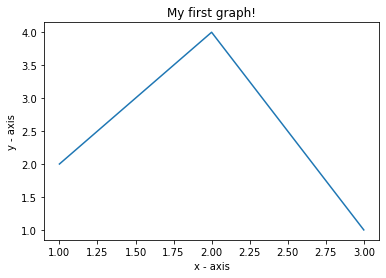

In [ ]:
#importing the required module
import matplotlib.pyplot as plt

# x axis values
x = [1,2,3]
# corresponding y axis values
y = [2,4,1]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# giving a title to my graph
plt.title('My first graph!')

# function to show the plot
plt.show()

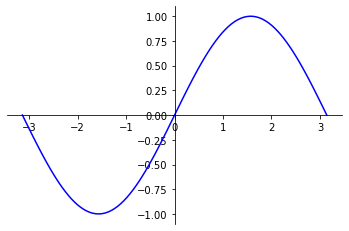

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-np.pi,np.pi,100)

# the function, which is y = sin(x) here
y = np.sin(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# plot the function
plt.plot(x,y, 'b-')

# show the plot
plt.show()

In [ ]:
import random
randomlist = []
for i in range(0,5):
 n = random.random(-1,1)
 randomlist.append(n)
print(randomlist)

TypeError: ignored

In [ ]:
# generate random floating point values
from random import seed
from random import gauss
# seed random number generator
seed(1)
# generate random numbers between 0-1
for _ in range(10):
 value = gauss(0,1)
 print(value)

1.2881847531554629
1.449445608699771
0.06633580893826191
-0.7645436509716318
-1.0921732151041414
0.03133451683171687
-1.022103170010873
-1.4368294451025299
0.19931197648375384
0.13337460465860485


In [ ]:
import pandas as pd
# Read in data and examine first 10 rows
flights = pd.read_csv('/content/pune temp data2 2020.csv')



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flights')

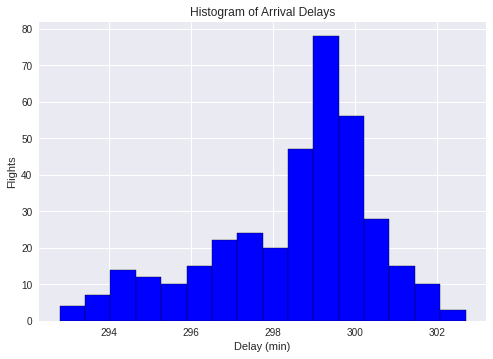

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(flights['t2m'], color = 'blue', edgecolor = 'black',
         bins = int(80/5))

# seaborn histogram
sns.distplot(flights['t2m'], hist=True, kde=False,
             bins=int(80/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

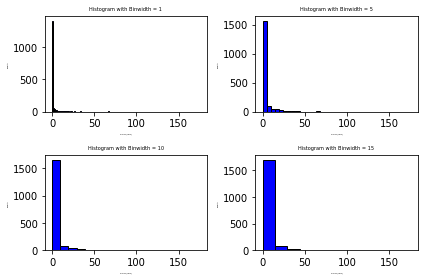

In [ ]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)

    # Draw the plot
    ax.hist(flights['RAINFALL'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 5)
    ax.set_xlabel('Delay (min)', size = 2)
    ax.set_ylabel('Flights', size= 2)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='t2m', ylabel='Density'>

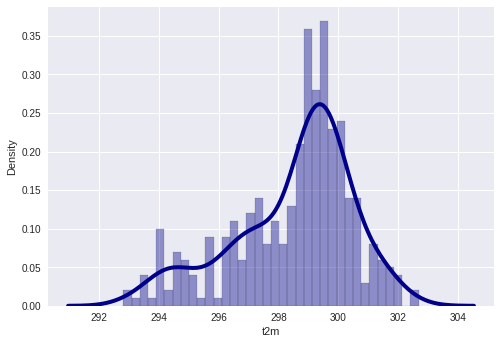

In [ ]:
# Density Plot and Histogram of all arrival delays
import numpy as np
sns.distplot(((flights['t2m'])), hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='swvl1', ylabel='Density'>

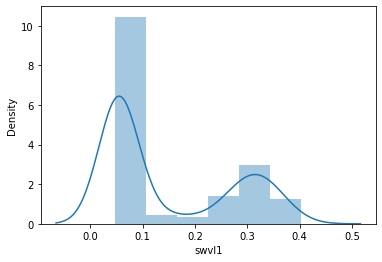

In [ ]:
import pandas as pd
# Read in data and examine first 10 rows
flights = pd.read_csv('/content/pune soil data 2020.csv')
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['swvl1'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='swvl1', ylabel='Density'>

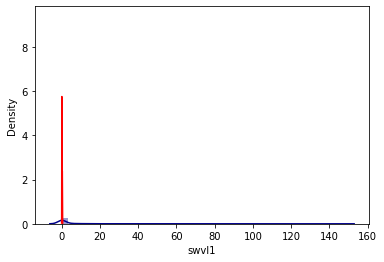

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read in data and examine first 10 rows
import xarray as xr

#ds =xr.open_mfdataset('/content/Five year data of that lon-lat.csv','/content/Five year data of that lon-lat of Bangalore.csv')
flights = pd.read_csv('/content/Five year data of that lon-lat.csv')
flights1 = pd.read_csv('/content/pune soil data.csv')
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['RAINFALL'],color = 'darkblue')
sns.distplot(flights1['swvl1'],color = 'red')

In [ ]:
import random
randomlist=[]
for i in range (0,10000):
  x=random.randint(1,9)
  randomlist.append(x)
print(randomlist)

[8, 3, 5, 5, 2, 2, 7, 9, 6, 4, 4, 7, 2, 6, 3, 8, 4, 2, 8, 1, 9, 2, 2, 5, 4, 8, 2, 6, 8, 8, 2, 4, 5, 1, 9, 7, 7, 4, 3, 7, 7, 5, 4, 5, 6, 5, 6, 3, 8, 5, 6, 7, 2, 4, 9, 6, 8, 8, 3, 1, 4, 8, 7, 3, 6, 2, 5, 5, 8, 3, 1, 2, 5, 6, 3, 6, 2, 1, 8, 9, 2, 5, 5, 6, 8, 9, 9, 8, 8, 2, 5, 9, 5, 9, 9, 4, 4, 3, 8, 1, 7, 4, 2, 9, 1, 6, 3, 9, 1, 6, 9, 8, 6, 7, 7, 9, 7, 7, 2, 4, 4, 8, 7, 3, 2, 4, 7, 3, 5, 4, 3, 4, 2, 4, 6, 3, 4, 5, 4, 2, 9, 5, 4, 9, 5, 7, 6, 1, 9, 4, 3, 3, 1, 7, 2, 4, 6, 2, 7, 1, 2, 1, 1, 9, 4, 6, 6, 4, 5, 8, 3, 5, 7, 3, 8, 3, 5, 2, 7, 6, 3, 8, 9, 9, 7, 6, 4, 7, 8, 5, 8, 4, 4, 2, 6, 8, 9, 6, 9, 3, 3, 3, 1, 2, 4, 6, 2, 6, 9, 4, 2, 1, 5, 8, 4, 1, 3, 2, 3, 7, 7, 2, 7, 4, 7, 7, 8, 8, 7, 2, 1, 3, 1, 6, 9, 9, 7, 1, 5, 7, 8, 5, 3, 1, 7, 6, 7, 8, 9, 7, 7, 6, 9, 2, 9, 1, 2, 1, 3, 2, 3, 3, 9, 2, 7, 4, 2, 5, 9, 1, 9, 8, 5, 2, 3, 5, 3, 3, 2, 6, 3, 8, 2, 8, 1, 8, 1, 7, 3, 3, 9, 4, 2, 8, 4, 9, 8, 3, 9, 4, 2, 8, 1, 1, 3, 9, 9, 3, 1, 3, 6, 9, 2, 8, 9, 2, 8, 5, 7, 9, 8, 8, 5, 5, 3, 6, 3, 9, 8, 5, 2, 7, 4, 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

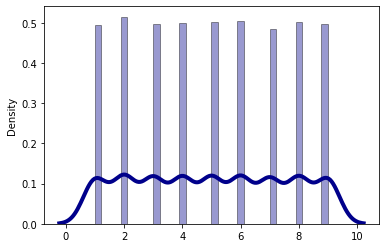

In [ ]:
sns.distplot(randomlist, hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

[10.16027352 -2.21770414  5.49820577 ...  6.07201028 12.23751992
 11.15272824]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


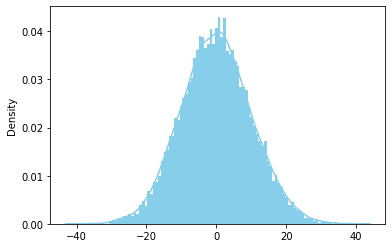

In [ ]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=10)
print(data_normal)

ax = sns.distplot(data_normal,
                   bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

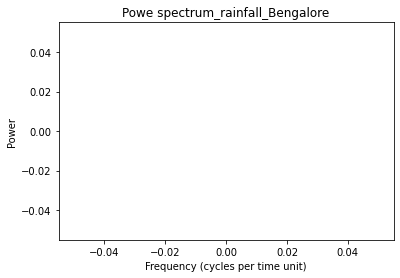

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the rainfall data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Five year data of that lon-lat of Pune (1).csv")

# Extract the rainfall time series as a NumPy array
rainfall = df["RAINFALL"][:365].values

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft((rainfall))
power_spectrum = np.abs((fft))**2
#power_spectrum1=(power_spectrum)

freq=np.fft.fftfreq((len(rainfall)))
plt.plot(freq,power_spectrum)
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.title("Powe spectrum_rainfall_Bengalore")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load data from CSV file
df = pd.read_csv('/content/pune temp data2 2020.csv')

# Extract the amplitude data from the DataFrame
amplitude = df['t2m'].values

# Create a scaler object
scaler = MinMaxScaler(feature_range=(0, 10000))

# Scale the data
amplitude_scaled = scaler.fit_transform(amplitude.reshape(-1, 1))

# Replace the original amplitude data with the scaled data in the DataFrame
df['amplitude'] = amplitude_scaled

# Save the scaled data to a new CSV file
df.to_csv('scaled_data.csv', index=False)


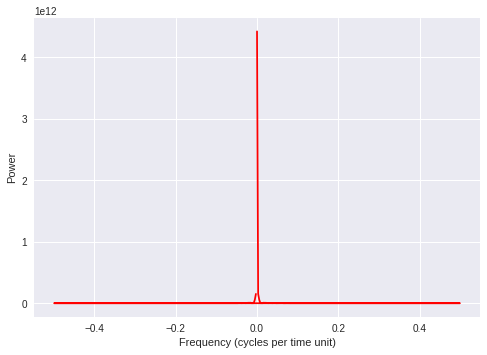

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''# Load the rainfall data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/pune temp data2 2020.csv")

# Extract the rainfall time series as a NumPy array
rainfall = df["t2m"][:].values

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft((rainfall))
power_spectrum = np.abs((fft))**2
#power_spectrum1=(power_spectrum)

#freq=np.fft.fftfreq(len(rainfall))
plt.plot(freq,power_spectrum)
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.title("Powe spectrum_temp_Pune")
#plt.show()
# Load the rainfall data from a CSV file into a Pandas DataFrame
'''
df = pd.read_csv("/content/scaled_data.csv")

# Extract the rainfall time series as a NumPy array
amplitude = df["amplitude"][:700].values
#N = len(amplitude)
#print(N)
#window = np.hamming(N)
#amplitude = amplitude * window
#print(amplitude)

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft((amplitude))
power_spectrum = np.abs((fft))**2
#power_spectrum1=(power_spectrum)
#################
#kfreq = np.fft.fftfreq(npix)*npix
# Plot the power spectrum
#plt.xscale("log")
#plt.yscale("log")
freq=np.fft.fftfreq(len(amplitude))
plt.plot(freq,power_spectrum, color="red")
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.show()

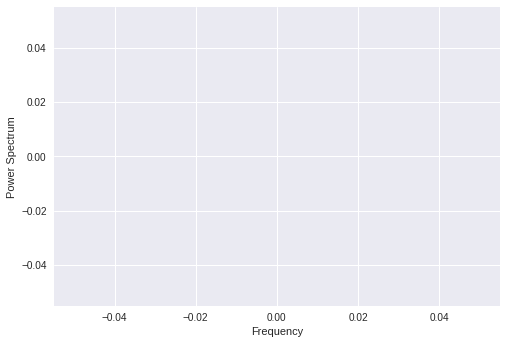

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = np.genfromtxt('/content/Five year data of that lon-lat of Bangalore.csv', delimiter=',')
#data = data[1].values
# Apply a Fourier transform to the data
fft_data = np.fft.fft(data)

# Calculate the power spectrum
power_spectrum = np.abs(fft_data)**2

# Create a frequency array
freq = np.fft.fftfreq(len(data))

# Plot the power spectrum against the frequency
plt.plot(freq, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()